# Use-Cases of TDA Usage over Time Series

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter('ignore')

from filtration.filtration import *
from filtration.time_series import *

pyo.init_notebook_mode(connected=True)

Populating the interactive namespace from numpy and matplotlib


The following notebook renders the output of filtration algorithms, and what may then be used into deep-learning frameworks. The issue with TDA is that it is mainly powerful on stationnary time-series, and a preprocessing (baseline removal) is generally necessary to work on non-stationnary ones. Here, the example is centered around EEGs, which are stationnary time-series, but the litterature is still struggling agains its preprocessing and its classification. The role of this notebook is mainly to present the tools. The classification part will be presented in another session.

## Data Loading (No Preprocessing)

In [2]:
eeg = np.load('./filtration/eeg_samples.npy')
eeg_signal = eeg[np.random.choice(np.arange(len(eeg)))]

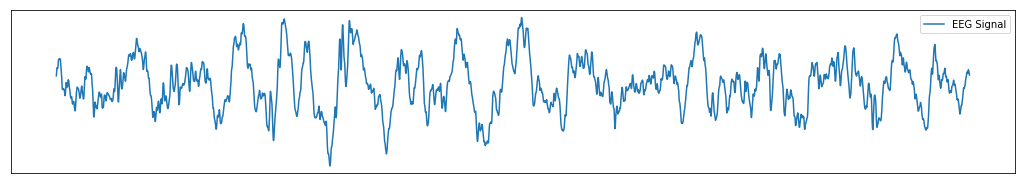

In [8]:
plt.figure(figsize=(18,3))
plt.plot(eeg_signal, label='EEG Signal')
plt.legend(loc='best')
plt.xticks([])
plt.yticks([])
plt.show()

## Value-Based Filtration of 1D Time-Serie

The next example results from the construction of a SimplexTree based on the temporal values of the time-serie. Two possibilities are observed: upper levels filtration and sub levels filtration (different diagrams are obtained). This method has great potential by its scalability to deep-learning and large datasets. Furthermore, the obtained diagrams are represented through betti curves (noise characterization) and persistence landscapes (objects characterization).

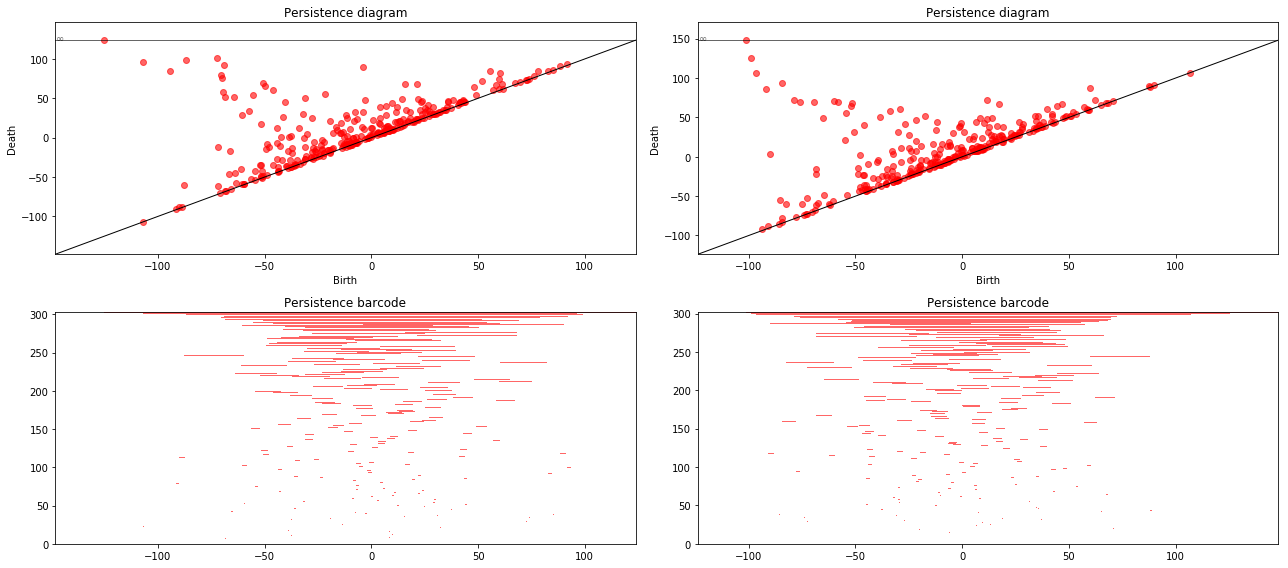

In [9]:
lvl = Levels(eeg_signal)
_,_ = lvl.get_persistence(graph=True)

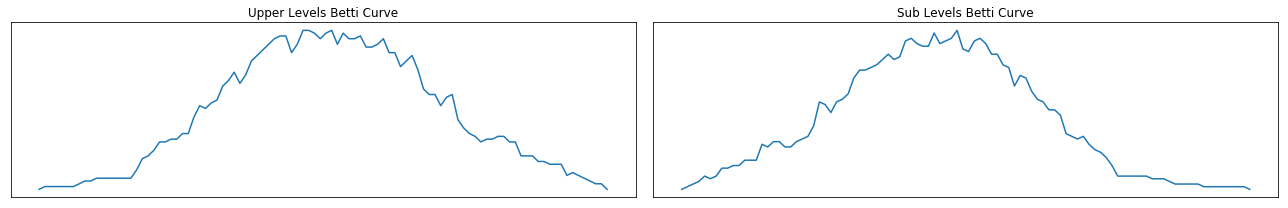

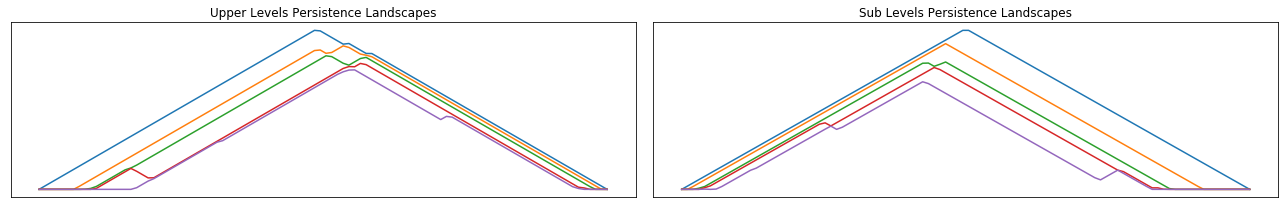

In [10]:
_,_ = lvl.betti_curves(graph=True)
_,_ = lvl.landscapes(graph=True)

## Time-Delay Embedding

For considerations of the evolution of this somewhat chaotic system, a possibility is given by the study of the time-delayed time-serie. This process allows us to recreate the vector in three dimensions, given a time_step (125 which is one second).

In [3]:
time_delayed_vec = vectorize(eeg_signal, 125, point_size=3, graph=True)

This is the format of your plot grid:
[ (1,1) x1,y1 ]



TDA is even more intuitional in three dimensions, especially when looking at the previous result. This new object has different characteristics, that TDA may highlight: connected components, cycles and cavities. The tool presented here under compares different outputs from different filtrations: Alpha Complex persistence (left), Sub Levels Filtration persistence (center) and DTM Filtration persistence (right). Depending on the filtration, the persistence diagrams and their respective 10 first landscapes are presented for visualization. One would observe that lots of information can be extracted from that process. The remaining question is: Is it useful for some specific task ?

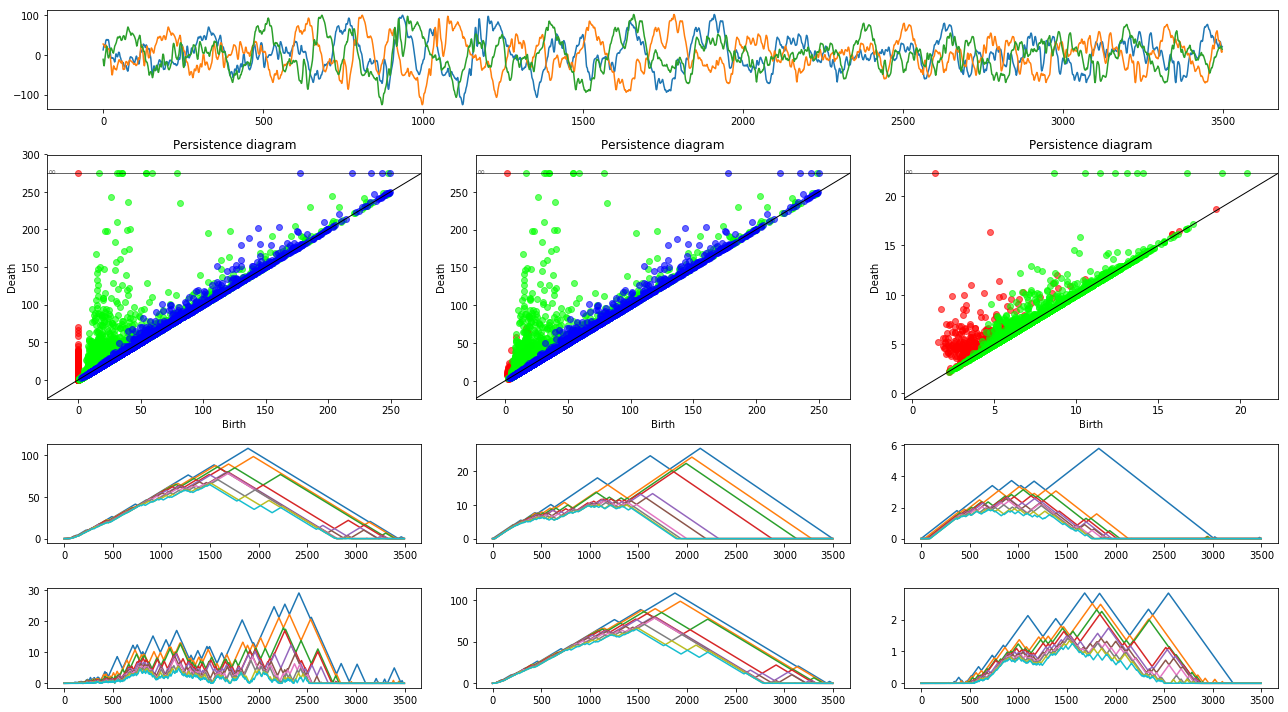

In [7]:
fil = Filtration(time_delayed_vec)
fil.visual()